In [10]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import seaborn as sns
import zipfile
import numpy as np
import cv2
# from google.colab.patches import cv2_imshow
tf.__version__

'2.16.1'

In [11]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
path = './Datasets/cat_dog_2.zip'
zip_object = zipfile.ZipFile(file=path, mode='r')
zip_object.extractall('./')
zip_object.close()

tf.keras.preprocessing.image.load_img('./cat_dog_2/training_set/cat/cat.1.jpg')
tf.keras.preprocessing.image.load_img('./cat_dog_2/training_set/dog/dog.1.jpg')

## 建立一個圖像數據生成器

In [15]:
# 導入圖像數據生成器
# 將圖片統一處理成64 x 64

# 創建圖像數據生成器並設置參數
training_generator = ImageDataGenerator(
    rescale=1./255,                 # 重新縮放像素值至 0 到 1 之間
    rotation_range=7,               # 隨機旋轉圖像的角度範圍
    horizontal_flip=True,           # 隨機水平翻轉圖像
    zoom_range=0.2                  # 隨機縮放圖像的範圍
)

# 從目錄中生成訓練數據集
train_dataset = training_generator.flow_from_directory(
    './cat_dog_2/training_set',  # 圖像目錄的路徑
    target_size=(64, 64),               # 調整圖像大小為 64x64 像素
    batch_size=32,                      # 每個批次的圖像數量
    class_mode='categorical',           # 分類模式，返回 one-hot 編碼的標籤
    shuffle=True                        # 在每個 epoch 結束時是否對數據進行洗牌
)


# 創建圖像數據生成器並設置參數
test_generator = ImageDataGenerator(
    rescale=1./255  # 重新縮放像素值至 0 到 1 之間
)

# 從目錄中生成測試數據集
test_dataset = test_generator.flow_from_directory(
    './cat_dog_2/test_set',  # 圖像目錄的路徑
    target_size=(64, 64),            # 調整圖像大小為 64x64 像素
    batch_size=1,                    # 每個批次的圖像數量為 1
    class_mode='categorical',        # 分類模式，返回 one-hot 編碼的標籤
    shuffle=False                    # 不對測試數據進行洗牌
)


Found 4000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [16]:
print(train_dataset.classes) # 類別編碼列表
print(train_dataset.class_indices) # 訓練數據集的類別與對應的索引

[0 0 0 ... 1 1 1]
{'cat': 0, 'dog': 1}


## 建立模型

In [17]:
network = Sequential()
network.add(Conv2D(32, (3,3), input_shape = (64,64,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Conv2D(32, (3,3), activation='relu'))
network.add(MaxPooling2D(pool_size=(2,2)))

network.add(Flatten())

network.add(Dense(units = 3137, activation='relu'))
network.add(Dense(units = 1570, activation='relu'))
network.add(Dense(units = 2, activation='softmax'))

/Users/chenweicheng/anaconda3/lib/python3.11/site-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [18]:
network.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 62, 62, 32)     │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 31, 31, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 29, 29, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 6272)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 3137)           │    19,678,401 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1570)           │     4,926,660 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 2)              │         3,142 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 24,618,347 (93.91 MB)

 Trainable params: 24,618,347 (93.91 MB)

 Non-trainable params: 0 (0.00 B)

## 編譯模型

In [19]:
network.compile(optimizer='Adam', loss='categorical_crossentropy', metrics = ['accuracy'])
history = network.fit(train_dataset, epochs=10)

Epoch 1/10


/Users/chenweicheng/anaconda3/lib/python3.11/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 92ms/step - accuracy: 0.5283 - loss: 1.0662
Epoch 2/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 98ms/step - accuracy: 0.6454 - loss: 0.6336
Epoch 3/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 96ms/step - accuracy: 0.6410 - loss: 0.6271
Epoch 4/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.7028 - loss: 0.5711
Epoch 5/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 14s 105ms/step - accuracy: 0.6980 - loss: 0.5773
Epoch 6/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 94ms/step - accuracy: 0.7230 - loss: 0.5392
Epoch 7/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 93ms/step - accuracy: 0.7365 - loss: 0.5293
Epoch 8/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 13s 95ms/step - accuracy: 0.7470 - loss: 0.5031
Epoch 9/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 12s 95ms/step - accuracy: 0.7828 - loss: 0.4578
Epoch 10/10
125/125 ━━━━━━━━━━━━━━━━━━━━ 11s 87ms/step - accuracy: 0.7956 - loss: 0.4409


## 評估模型

In [20]:
predictions = network.predict(test_dataset)
predictions

1000/1000 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step


array([[0.30604535, 0.6939546 ],
       [0.02204924, 0.9779507 ],
       [0.43300077, 0.5669992 ],
       ...,
       [0.01599751, 0.9840024 ],
       [0.02153797, 0.978462  ],
       [0.00205373, 0.9979463 ]], dtype=float32)

In [21]:
# predictions = np.argmax(predictions, axis = 1)
print("預測值")
print(predictions[:20])

print("對照答案")
print(test_dataset.classes[:20])


預測值
[[0.30604535 0.6939546 ]
 [0.02204924 0.9779507 ]
 [0.43300077 0.5669992 ]
 [0.69252306 0.3074769 ]
 [0.61492777 0.3850722 ]
 [0.06283606 0.93716395]
 [0.23090929 0.7690907 ]
 [0.22988543 0.77011454]
 [0.17608832 0.82391167]
 [0.63018715 0.36981285]
 [0.46629038 0.5337096 ]
 [0.22864906 0.7713509 ]
 [0.68981266 0.31018734]
 [0.6363676  0.36363235]
 [0.14834967 0.85165036]
 [0.05543229 0.94456774]
 [0.16416085 0.83583915]
 [0.13387252 0.86612755]
 [0.00840318 0.9915969 ]
 [0.19077379 0.8092262 ]]
對照答案
[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]


In [22]:
from sklearn.metrics import accuracy_score
accuracy_score(test_dataset.classes, predictions)
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(test_dataset.classes, predictions)
sns.heatmap(cm, annot=True, linewidths=0.5)

ValueError: Classification metrics can't handle a mix of binary and continuous-multioutput targets

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       500
           1       0.70      0.82      0.76       500

    accuracy                           0.74      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.75      0.74      0.74      1000



## 儲存/載入模型

In [ ]:
# 儲存模型結構
model_json = network.to_json()
with open('network.json','w') as json_file:
  json_file.write(model_json)

# 儲存模型參數
from keras.models import save_model
network_saved = save_model(network, './weights.hdf5') 

In [ ]:
# 載入模型結構
with open('network.json', 'r') as json_file:
  json_saved_model = json_file.read()

# 載入模型參數
network_loaded = tf.keras.models.model_from_json(json_saved_model)
network_loaded.load_weights('weights.hdf5')

查看模型消息

In [ ]:
from sklearn.metrics import classification_report
print(classification_report(test_dataset.classes, predictions))

              precision    recall  f1-score   support

           0       0.79      0.66      0.72       500
           1       0.70      0.82      0.76       500

    accuracy                           0.74      1000
   macro avg       0.75      0.74      0.74      1000
weighted avg       0.75      0.74      0.74      1000



## Classifying one single image

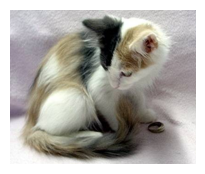

In [ ]:
image = cv2.imread('./cat_dog_2/test_set/cat/cat.3500.jpg')

plt.figure(figsize=(4, 2))
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # 將 OpenCV 中的 BGR 格式轉換為 RGB 格式，因為 Matplotlib 預期的是 RGB 格式
plt.axis('off')  # 隱藏坐標軸
plt.imshow(image)

將圖片統一成符合模型大小

In [ ]:
image = cv2.resize(image, (64, 64)) # 統一大小
image = image / 255 # 條整像素
image = image.reshape(-1, 64, 64, 3) # 調整模型尺寸

In [ ]:
result = network_loaded(image)
result

<tf.Tensor: shape=(1, 2), dtype=float32, numpy=array([[0.7940461 , 0.20595384]], dtype=float32)>

In [ ]:
result = np.argmax(result)
result

0

In [ ]:
test_dataset.class_indices

{'cat': 0, 'dog': 1}

In [ ]:
if result == 0:
  print('Cat')
else:
  print('Dog')

Cat
